In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
music_df = pd.read_csv('cleaned_music_data.csv')
music_df.rename(columns={'Unnamed: 0':'orig_index'},inplace=True)
music_df = music_df.set_index('orig_index')
music_df.head()

,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,loudness,name,popularity,tempo
orig_index,,,,,,,,,,,,
7606,1960,0.547,['Etta James'],0.274,179693,0.348,0,0.013300,-8.631,At Last,76,87.430
7607,1960,0.829,['Etta James'],0.421,196133,0.285,0,0.000002,-9.430,A Sunday Kind Of Love,70,85.861
7608,1960,0.764,['Ella Fitzgerald'],0.508,175987,0.287,0,0.000000,-12.472,Sleigh Ride,69,154.759
7609,1960,0.733,['Ella Fitzgerald'],0.579,131733,0.502,0,0.000000,-7.570,Frosty The Snowman,69,76.816
7610,1960,0.699,['Neil Sedaka'],0.743,139200,0.799,0,0.000000,-5.466,Breaking Up Is Hard to Do,62,116.112


In [3]:
# Only take new songs to compare new popular songs against unpopular ones
new_songs = music_df[(music_df['year']>=2015)]
new_songs.shape

(9815, 12)

In [4]:
print(f"Popularity of new songs has a mean of {new_songs['popularity'].mean():.4f} and and standard deviation of {new_songs['popularity'].std():.4f}.")

Popularity of new songs has a mean of 61.6843 and and standard deviation of 14.6754.


In [5]:
# Define popular songs as rating of 77 and higher, which is one standard deviations above the mean (top 15%)
popular_songs = new_songs[(new_songs['popularity']>=77)]

popular_songs

,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,loudness,name,popularity,tempo
orig_index,,,,,,,,,,,,
18606,2015,0.00543,['BØRNS'],0.611,218107,0.797,0,0.001370,-7.627,Electric Love,87,120.041
18607,2015,0.06780,['The Neighbourhood'],0.588,260173,0.521,0,0.149000,-9.461,Daddy Issues,86,85.012
18608,2015,0.01150,['Tame Impala'],0.640,216320,0.740,1,0.006780,-4.083,The Less I Know The Better,85,116.879
18609,2015,0.20500,['Chris Stapleton'],0.392,293293,0.370,0,0.009600,-10.888,Tennessee Whiskey,79,48.718
18610,2015,0.03710,['WILLOW'],0.764,196520,0.705,0,0.000019,-5.279,Wait a Minute!,83,101.003
...,...,...,...,...,...,...,...,...,...,...,...,...
124710,2019,0.01490,"['Riton', 'Oliver Heldens', 'Vula']",0.737,208474,0.828,0,0.000583,-4.711,Turn Me On (feat. Vula),78,124.052
140372,2018,0.14900,"['Super Yei', 'Sammy', 'Myke Towers', 'Lenny T...",0.656,307435,0.662,0,0.000008,-1.387,La Forma en Que Me Miras,77,189.983
140502,2019,0.24100,['Rels B'],0.846,209680,0.548,0,0.071300,-6.397,A Mí,79,94.925


In [6]:
# Define recent releases that are not popular, 2 standard deviations below the mean, up to the mean 
    # Deciding to ignore lower 15%, needs to be known but not played often 

unpopular_songs = new_songs[(new_songs['popularity']<62)]
unpopular_songs = unpopular_songs[(unpopular_songs['popularity']>=32)]
unpopular_songs

,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,loudness,name,popularity,tempo
orig_index,,,,,,,,,,,,
37613,2015,0.834000,['Alabama Shakes'],0.628,268853,0.329,0,0.003350,-11.424,This Feeling,61,130.808
37630,2015,0.344000,['Houndmouth'],0.472,258480,0.347,0,0.037900,-8.011,Darlin',61,116.904
37660,2015,0.051300,['Parker McCollum'],0.558,210760,0.662,0,0.000000,-6.129,Meet You in the Middle,61,97.962
37671,2015,0.066600,['Upchurch'],0.644,167973,0.763,1,0.000000,-6.487,Cheatham County,61,172.161
37672,2015,0.004630,['Bea Miller'],0.539,211573,0.869,0,0.000000,-5.341,Fire N Gold,61,143.987
...,...,...,...,...,...,...,...,...,...,...,...,...
170438,2019,0.389000,['Vansire'],0.822,162663,0.544,0,0.165000,-10.077,Metamodernity,61,121.968
170443,2019,0.115000,['Hozier'],0.456,331013,0.750,1,0.000017,-4.609,No Plan,57,80.019
170449,2019,0.001210,['Wallows'],0.449,247613,0.825,0,0.000000,-5.177,Just Like A Movie,60,135.934


### Tempo

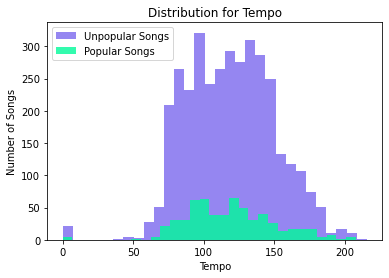

In [67]:
# Tempo
x1 = popular_songs['tempo']
x2 = unpopular_songs['tempo']

plt.hist(x2, bins=30, alpha=0.8, color="mediumslateblue", label="Unpopular Songs")
plt.hist(x1, bins=30, alpha=0.8, color="mediumspringgreen", label="Popular Songs")

plt.xlabel("Tempo")
plt.ylabel("Number of Songs")
plt.title("Distribution for Tempo")
plt.legend()
plt.show()

In [68]:
print(f"Average tempo for popular songs is {popular_songs['tempo'].mean():.3f} and for unpopular songs is {unpopular_songs['tempo'].mean():.3f}.\n Tempo for all new songs has a mean of {new_songs['tempo'].mean():.3f} and a standard deviation of {new_songs['tempo'].std():.3f}.")

Average tempo for popular songs is 118.440 and for unpopular songs is 118.908.
 Tempo for all new songs has a mean of 119.667 and a standard deviation of 30.840.


### Duration

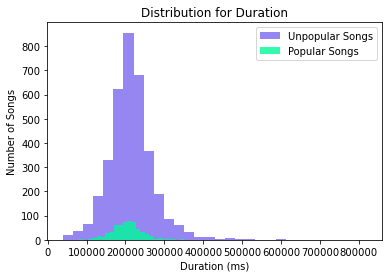

In [69]:
# Duration 
x1 = popular_songs['duration_ms']
x2 = unpopular_songs['duration_ms']

plt.hist(x2, bins=30, alpha=0.8, color="mediumslateblue", label="Unpopular Songs")
plt.hist(x1, bins=30, alpha=0.8, color="mediumspringgreen", label="Popular Songs")

plt.xlabel("Duration (ms)")
plt.ylabel("Number of Songs")
plt.title("Distribution for Duration")
plt.legend()
plt.show()

In [70]:
print(f"Average duration for popular songs is {popular_songs['duration_ms'].mean():.3f} and for unpopular songs is {unpopular_songs['duration_ms'].mean():.3f}.\n Duration for all new songs has a mean of {new_songs['duration_ms'].mean():.3f} and a standard deviation of {new_songs['duration_ms'].std():.3f}.")

Average duration for popular songs is 204560.270 and for unpopular songs is 214419.160.
 Duration for all new songs has a mean of 213702.167 and a standard deviation of 61818.738.


### Loudness

In [71]:
print(f"Average loudness for popular songs is {popular_songs['loudness'].mean():.3f} and for unpopular songs is {unpopular_songs['loudness'].mean():.3f}.\n Loudness for all new songs has a mean of {new_songs['loudness'].mean():.3f} and a standard deviation of {new_songs['loudness'].std():.3f}.")

Average loudness for popular songs is -6.809 and for unpopular songs is -8.012.
 Loudness for all new songs has a mean of -7.766 and a standard deviation of 4.975.


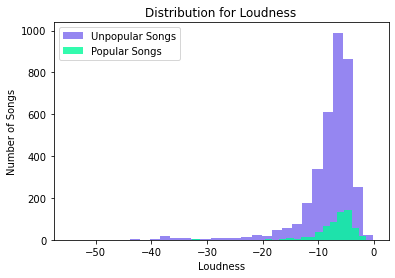

In [72]:
# Loudness
x1 = popular_songs['loudness']
x2 = unpopular_songs['loudness']

plt.hist(x2, bins=30, alpha=0.8, color="mediumslateblue", label="Unpopular Songs")
plt.hist(x1, bins=30, alpha=0.8, color="mediumspringgreen", label="Popular Songs")

plt.xlabel("Loudness")
plt.ylabel("Number of Songs")
plt.title("Distribution for Loudness")
plt.legend()
plt.show()

### Danceability

In [73]:
print(f"Average danceability for popular songs is {popular_songs['danceability'].mean():.3f} and for unpopular songs is {unpopular_songs['danceability'].mean():.3f}.\n Danceability for all new songs has a mean of {new_songs['danceability'].mean():.3f} and a standard deviation of {new_songs['danceability'].std():.3f}.")

Average danceability for popular songs is 0.664 and for unpopular songs is 0.605.
 Danceability for all new songs has a mean of 0.624 and a standard deviation of 0.174.


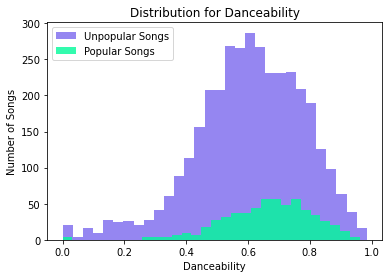

In [74]:
# Danceability
x1 = popular_songs['danceability']
x2 = unpopular_songs['danceability']

plt.hist(x2, bins=30, alpha=0.8, color="mediumslateblue", label="Unpopular Songs")
plt.hist(x1, bins=30, alpha=0.8, color="mediumspringgreen", label="Popular Songs")

plt.xlabel("Danceability")
plt.ylabel("Number of Songs")
plt.title("Distribution for Danceability")
plt.legend()
plt.show()

### Energy

In [75]:
print(f"Average energy for popular songs is {popular_songs['energy'].mean():.3f} and for unpopular songs is {unpopular_songs['energy'].mean():.3f}.\n Energy for all new songs has a mean of {new_songs['energy'].mean():.3f} and a standard deviation of {new_songs['energy'].std():.3f}.")

Average energy for popular songs is 0.593 and for unpopular songs is 0.600.
 Energy for all new songs has a mean of 0.601 and a standard deviation of 0.216.


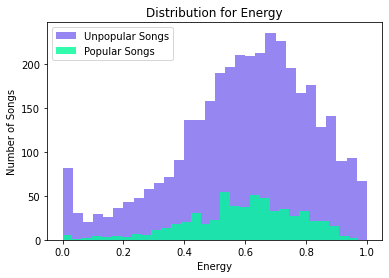

In [76]:
# Energy
x1 = popular_songs['energy']
x2 = unpopular_songs['energy']

plt.hist(x2, bins=30, alpha=0.8, color="mediumslateblue", label="Unpopular Songs")
plt.hist(x1, bins=30, alpha=0.8, color="mediumspringgreen", label="Popular Songs")

plt.xlabel("Energy")
plt.ylabel("Number of Songs")
plt.title("Distribution for Energy")
plt.legend()
plt.show()

### Acousticness

In [77]:
print(f"Average acousticness for popular songs is {popular_songs['acousticness'].mean():.3f} and for unpopular songs is {unpopular_songs['acousticness'].mean():.3f}.\n Acousticness for all new songs has a mean of {new_songs['acousticness'].mean():.3f} and a standard deviation of {new_songs['acousticness'].std():.3f}.")

Average acousticness for popular songs is 0.281 and for unpopular songs is 0.272.
 Acousticness for all new songs has a mean of 0.274 and a standard deviation of 0.292.


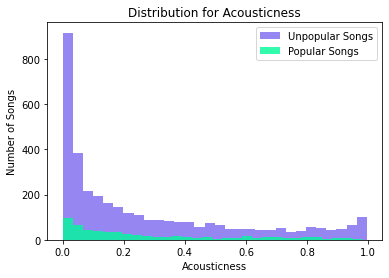

In [78]:
# Acousticness
x1 = popular_songs['acousticness']
x2 = unpopular_songs['acousticness']

plt.hist(x2, bins=30, alpha=0.8, color="mediumslateblue", label="Unpopular Songs")
plt.hist(x1, bins=30, alpha=0.8, color="mediumspringgreen", label="Popular Songs")

plt.xlabel("Acousticness")
plt.ylabel("Number of Songs")
plt.title("Distribution for Acousticness")
plt.legend()
plt.show()

### Explicit

In [79]:
print(f"Average explicit for popular songs is {popular_songs['explicit'].mean():.3f} and for unpopular songs is {unpopular_songs['explicit'].mean():.3f}.\n Explicit for all new songs has a mean of {new_songs['explicit'].mean():.3f} and a standard deviation of {new_songs['explicit'].std():.3f}.")

Average explicit for popular songs is 0.382 and for unpopular songs is 0.363.
 Explicit for all new songs has a mean of 0.349 and a standard deviation of 0.477.


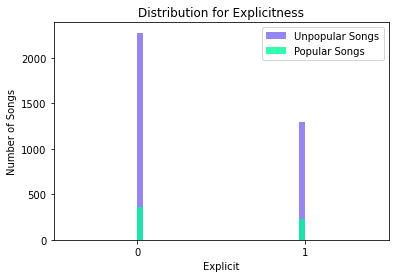

In [86]:
# Explicit
x1 = popular_songs['explicit']
x2 = unpopular_songs['explicit']

plt.hist(x2, bins=30, alpha=0.8, color="mediumslateblue", label="Unpopular Songs")
plt.hist(x1, bins=30, alpha=0.8, color="mediumspringgreen", label="Popular Songs")

plt.xlabel("Explicit")
plt.ylabel("Number of Songs")
plt.title("Distribution for Explicitness")
plt.xlim([-.5,1.5])
plt.xticks([0,1])
plt.legend()
plt.show()